In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)

## Inputs and Variables

In [2]:
#Inputs
Initial_Number_Users=10000
Final_Number_Users=100000
Avg_Nb_Transaction=2  #per user per day
Avg_Amount_Transaction=100
Time=12  #years
tau=2.5   #cursor
Defi_Redistrib_period=90  #days
Fund_Period=6


In [3]:
#Variables

Transaction_fee=0.01 #1%
Defi_prop=0.5       #50%

In [4]:
#Hypothesis

defi_return = 0.07  #7%
fund_return = 0.15  #15% = multiple of invested capital of 2.5 in 10 years

In [5]:
#functions

def sum_chunk(x, chunk_size, axis=-1):
    Mod = chunk_size - np.mod(len(x), chunk_size)
    x = np.concatenate((x, np.zeros(Mod)))
    shape = x.shape
    if axis < 0:
        axis += x.ndim
    shape = shape[:axis] + (-1, chunk_size) + shape[axis+1:]
    x = x.reshape(shape)
    return x.sum(axis=axis+1)


## Pre requisits

In [6]:
nb_days=365*Time
days = np.linspace(1, nb_days, nb_days)
days_defi = np.mod(days,Defi_Redistrib_period)
Redistrib_index=np.where(days_defi==0)

days_sigmoid = np.linspace(-10, 10, nb_days)
sigmoid = 1/(1 + np.exp(-days_sigmoid/tau))

Number_Users = Initial_Number_Users + Final_Number_Users*sigmoid
User_at_redistrib=Number_Users[Redistrib_index]

Text(0, 0.5, 'Number of Users')

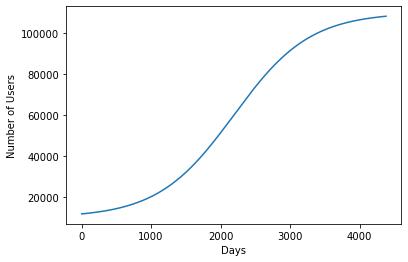

In [7]:
plt.plot(days,Number_Users)
plt.xlabel("Days")
plt.ylabel("Number of Users")

In [8]:
Amount=Number_Users*Avg_Nb_Transaction*Avg_Amount_Transaction*Transaction_fee
Defi_inv=Amount*Defi_prop
Fund_inv=Amount*(1-Defi_prop)
print(Amount)

[ 23597.24199242  23603.70128217  23610.17195717 ... 216389.82804283
 216396.29871783 216402.75800758]


## DeFi Return Calculation

In [9]:
Defi_FV=Defi_inv*np.power(np.ones(Time*365)*(1+defi_return/365),days_defi) #Future value at redistrinbution time, compound interest taken into account

Text(0, 0.5, 'Future Value of redistributed amount')

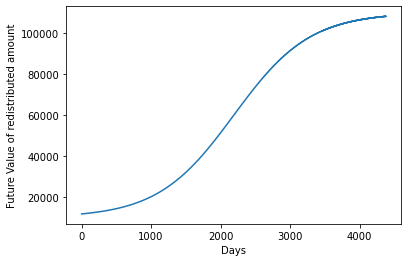

In [10]:
plt.plot(days,Defi_FV)
plt.xlabel("Days")
plt.ylabel("Future Value of redistributed amount")

Text(0, 0.5, 'Montant redistribué en utilisant la DeFi')

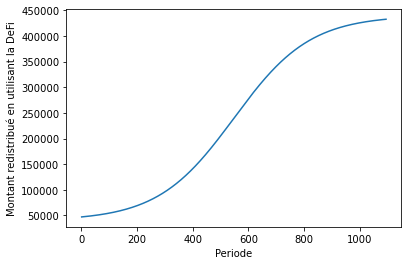

In [11]:
Defi_redistribution_amounts=sum_chunk(Defi_FV,Defi_Redistrib_period)
periode=np.linspace(1,len(Defi_redistribution_amounts),len(Defi_redistribution_amounts))
plt.plot(periode[:-2],Defi_redistribution_amounts[:-2])
plt.xlabel("Periode")
plt.ylabel("Montant redistribué en utilisant la DeFi")

Text(0, 0.5, 'Montant redistribué par utilisateurb grâce à la defi')

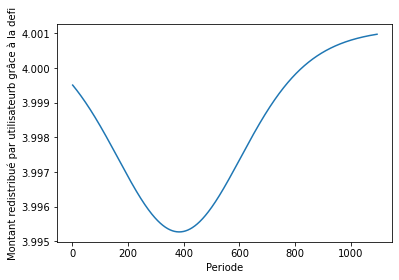

In [12]:
UBI_per_user_defi=Defi_redistribution_amounts[:-1]/User_at_redistrib
plt.plot(periode[:-1],UBI_per_user_defi)
plt.xlabel("Periode")
plt.ylabel("Montant redistribué par utilisateurb grâce à la defi")

## Funds Return Calculation

<ipython-input-13-172063680e6b>:10: RuntimeWarning: divide by zero encountered in true_divide
  Amount_redistrib_fund=Funds_redistribution_amounts_year/Nb_of_redistrib_fund


Text(0, 0.5, 'Montant redistribué en utilisant \n les produit financier')

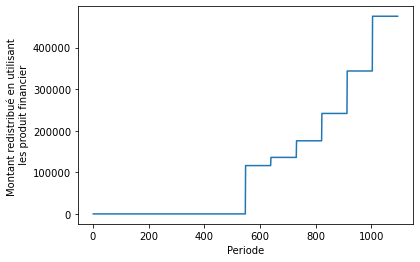

In [13]:
Funds_Closing_Amounts=sum_chunk(Fund_inv,365)
Funds_FV=Funds_Closing_Amounts*(np.power((1+fund_return),Fund_Period))
Funds_redistribution_amounts_year=np.concatenate((np.zeros(Fund_Period),Funds_FV))
Funds_redistribution_amounts_year=Funds_redistribution_amounts_year[:-6]

Redistrib_time=np.zeros(Time*365)
Redistrib_time[Redistrib_index]=1

Nb_of_redistrib_fund=sum_chunk(Redistrib_time,365)
Amount_redistrib_fund=Funds_redistribution_amounts_year/Nb_of_redistrib_fund

Funds_redistribution_amounts=np.zeros(int(np.sum(Redistrib_time)))
j = 0
k = 0
for i in range (0,len(Funds_redistribution_amounts)-1):
    if j<Nb_of_redistrib_fund[k]:
        Funds_redistribution_amounts[i]=Amount_redistrib_fund[k]
    else:
        j=0
        k+=1
        Funds_redistribution_amounts[i]=Amount_redistrib_fund[k]
    j+=1

plt.plot(periode[:-2],Funds_redistribution_amounts[:-1])
plt.xlabel("Periode")
plt.ylabel("Montant redistribué en utilisant \n les produit financier")

Text(0, 0.5, 'Montant redistribué par utilisateurb grâce aux produits financier')

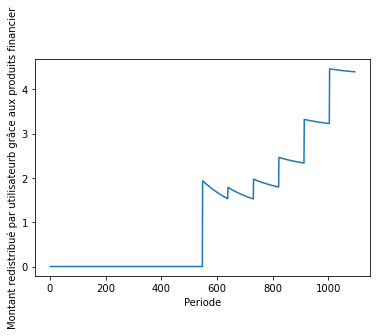

In [14]:
UBI_per_user_fund=Funds_redistribution_amounts/User_at_redistrib
plt.plot(periode[:-2],UBI_per_user_fund[:-1])
plt.xlabel("Periode")
plt.ylabel("Montant redistribué par utilisateurb grâce aux produits financier")

## Total UBI

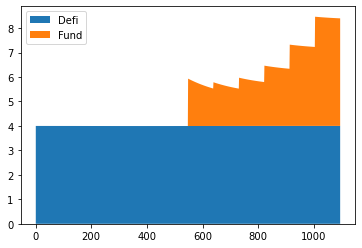

In [15]:
plt.stackplot(periode[:-2],UBI_per_user_defi[:-1],UBI_per_user_fund[:-1], labels=['Defi','Fund'])
plt.legend(loc='upper left')